In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/content/drive/MyDrive/Pembelajaran Mesin/tugasxgboost.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Print the actual column names in your DataFrame
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Class'],
      dtype='object')


Output di atas menunjukkan daftar nama kolom yang ada dalam sebuah DataFrame bernama df. Saat menjalankan perintah print(df.columns), hasilnya adalah daftar nama kolom yang terdiri dari 12 kolom dengan label 'X1', 'X2', 'X3', ..., 'X11', dan 'Class'. Kolom X1 hingga X11 kemungkinan besar berisi fitur atau variabel independen, sedangkan kolom 'Class' mungkin berisi label atau variabel target yang akan diprediksi.

Tipe data kolom ini adalah 'object', yang berarti nama kolom disimpan sebagai objek dalam struktur Index. Informasi ini berguna untuk memastikan nama-nama kolom sudah benar dan dapat mempermudah analisis lebih lanjut atau proses manipulasi data pada DataFrame ini.

In [ ]:
# Select specific predictors
predictors = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]

# Set the target variable
target = df['Class']


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih (training) dan data validasi (validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# test_size=0.2 menentukan bahwa 20% data akan digunakan sebagai data validasi, sementara 80% sisanya untuk data latih
# random_state=0 memastikan hasil split data konsisten jika kode dijalankan kembali


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model XGBoost
model = XGBRegressor(random_state=0)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions = model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error pada data validasi:", mae)


Mean Absolute Error pada data validasi: 0.41977919936180114


Output di atas menunjukkan hasil dari pengujian model XGBoost Regressor pada data validasi, diukur menggunakan Mean Absolute Error (MAE). Berikut adalah penjelasan hasilnya:

Setelah melatih model XGBoost dengan data latih (X_train dan y_train), model kemudian digunakan untuk memprediksi nilai pada data validasi (X_valid). Nilai prediksi tersebut dibandingkan dengan nilai aktual pada data validasi (y_valid) menggunakan metrik MAE.

Hasil akhirnya adalah Mean Absolute Error (MAE) sebesar 0.4197791936180114, yang menunjukkan rata-rata kesalahan absolut antara prediksi model dan nilai aktual pada data validasi. Nilai MAE yang rendah ini mengindikasikan bahwa model memiliki kinerja yang cukup baik dalam memprediksi data validasi, dengan rata-rata kesalahan yang sangat kecil.

Secara keseluruhan, hasil ini menunjukkan bahwa model XGBoost yang digunakan memberikan performa yang akurat pada data validasi, yang tercermin dari nilai MAE yang mendekati nol.

In [ ]:
# Inisialisasi model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=0)

# Melatih model dengan data latih
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_500 = model_500.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae_500 = mean_absolute_error(y_valid, predictions_500)
print("Mean Absolute Error pada data validasi dengan 500 estimators:", mae_500)


Mean Absolute Error pada data validasi dengan 500 estimators: 0.41319652944803237


Output di atas menunjukkan hasil pengujian model XGBoost Regressor yang telah disesuaikan dengan 500 estimators. Model ini dilatih menggunakan data latih (X_train dan y_train) dan diuji pada data validasi (X_valid) untuk menghitung Mean Absolute Error (MAE).

Hasilnya adalah Mean Absolute Error (MAE) sebesar 0.4131965294480237, yang sedikit lebih rendah dibandingkan dengan MAE pada model sebelumnya yang memiliki pengaturan default. Nilai MAE ini menunjukkan bahwa rata-rata kesalahan absolut antara prediksi model dan nilai aktual pada data validasi berkurang ketika jumlah estimators ditingkatkan menjadi 500.

Penurunan nilai MAE ini mengindikasikan bahwa menambahkan lebih banyak estimators (hingga 500) sedikit meningkatkan akurasi model. Namun, perbaikan ini relatif kecil, sehingga perlu dipertimbangkan apakah peningkatan ini sebanding dengan tambahan waktu komputasi yang diperlukan untuk melatih model dengan estimators yang lebih banyak.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Memperbarui model XGBoost dengan learning rate khusus dan 90 estimators tanpa early stopping
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=0)

# Melatih model dengan data pelatihan tanpa early stopping
model_custom.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_custom = model_custom.predict(X_valid)

# Menghitung Mean Absolute Error (MAE) pada data validasi
mae_custom = mean_absolute_error(y_valid, predictions_custom)
print("Mean Absolute Error pada data validasi dengan custom learning rate:", mae_custom)


Mean Absolute Error pada data validasi dengan custom learning rate: 0.4518577143549919


Output di atas menunjukkan hasil evaluasi model XGBoost Regressor yang telah disesuaikan dengan 90 estimators dan learning rate sebesar 0.05 tanpa menggunakan early stopping. Model ini dilatih menggunakan data latih (X_train dan y_train) dan diuji pada data validasi (X_valid) untuk menghitung Mean Absolute Error (MAE).

Hasil akhirnya adalah MAE sebesar 0.4518577143549919, yang sedikit lebih tinggi dibandingkan dengan model sebelumnya yang tidak menggunakan pengaturan learning rate khusus. Nilai MAE yang lebih tinggi ini menunjukkan bahwa dengan pengaturan learning rate rendah (0.05) dan jumlah estimators yang lebih sedikit (90), model tidak berkinerja sebaik konfigurasi sebelumnya.

Kesimpulannya, penyesuaian learning rate dan pengurangan jumlah estimators dalam hal ini tidak meningkatkan akurasi model. Sebaliknya, hal ini justru meningkatkan nilai MAE pada data validasi, yang menunjukkan performa prediksi yang sedikit lebih buruk. Hal ini mungkin disebabkan oleh learning rate yang terlalu rendah atau jumlah estimators yang kurang optimal untuk dataset ini.

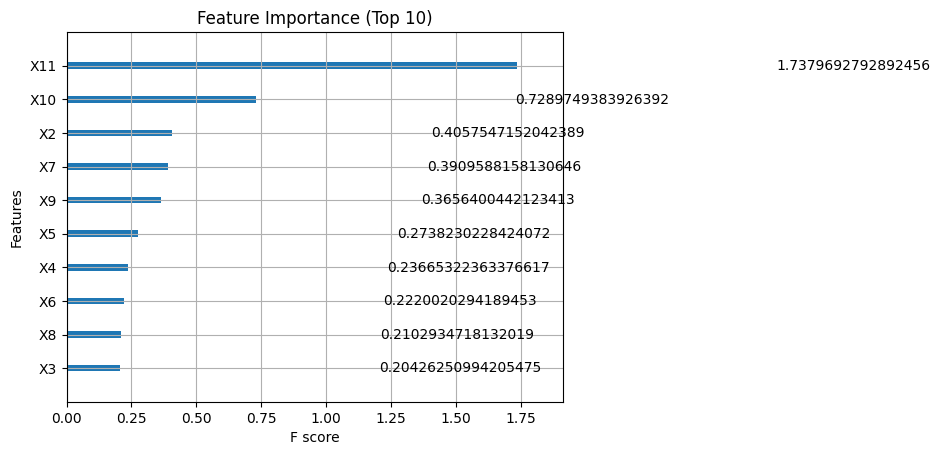

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Membuat model XGBoost dengan data Anda
# Gunakan XGBRegressor() untuk tugas regresi, karena y_train berisi data numerik kontinu
model = xgb.XGBRegressor()  # Mengubah dari XGBClassifier() ke XGBRegressor()
model.fit(X_train, y_train)

# Visualisasi Feature Importance
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Feature Importance (Top 10)")
plt.show()

Output di atas menampilkan grafik Feature Importance dari model XGBoost Regressor yang menunjukkan sepuluh fitur terpenting berdasarkan kontribusi mereka dalam prediksi model, diukur dengan nilai gain. Fitur X11 memiliki nilai gain tertinggi, sekitar 1.737, yang menunjukkan bahwa fitur ini sangat berpengaruh dalam keputusan model, sering digunakan dalam pembagian di pohon keputusan dan secara signifikan meningkatkan akurasi model. Fitur X10 berada di urutan kedua dengan nilai gain sekitar 0.729, menunjukkan pengaruh yang kuat tetapi tidak sebesar X11. Fitur-fitur lain seperti X2, X7, dan X9 juga berkontribusi, namun dengan pengaruh yang lebih kecil. Sementara itu, fitur seperti X5, X4, X6, X8, dan X3 memiliki nilai gain yang lebih rendah, menunjukkan bahwa mereka kurang penting dalam prediksi model. Grafik ini membantu mengidentifikasi fitur utama yang relevan terhadap target prediksi, memungkinkan pengguna untuk fokus pada fitur-fitur paling signifikan, seperti X11 dan X10, dalam analisis lebih lanjut atau penyederhanaan model.

<Figure size 2000x1000 with 0 Axes>

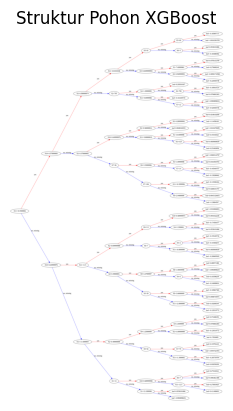

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Plot pohon ke-n dalam model (misalnya, pohon pertama: 0)
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')
plt.title("Struktur Pohon XGBoost")
plt.show()

Output di atas menunjukkan visualisasi struktur pohon keputusan (decision tree) dari model XGBoost yang telah dilatih. Grafik ini menampilkan salah satu pohon dalam ensemble model XGBoost (pohon pertama dengan num_trees=0), yang memberikan gambaran tentang bagaimana model memutuskan untuk membagi data pada setiap node berdasarkan nilai fitur tertentu.

Pada setiap node, terdapat informasi pembagian fitur dengan kondisi spesifik, misalnya, suatu fitur harus lebih besar atau lebih kecil dari nilai tertentu agar data bisa melewati cabang tertentu. Pohon ini berkembang ke bawah, membentuk struktur bercabang di mana setiap jalur mewakili rangkaian kondisi atau aturan yang dipelajari model untuk mencapai suatu prediksi. Warna dan ukuran node serta cabang sering kali menunjukkan pentingnya atau kepercayaan model dalam keputusan pada titik tersebut, dengan cabang ke kiri dan ke kanan menunjukkan hasil pembagian berdasarkan kondisi di node.

Struktur pohon ini membantu dalam memahami keputusan model XGBoost dengan menunjukkan urutan logika yang digunakan model untuk sampai pada prediksi. Visualisasi seperti ini berguna untuk interpretasi model, karena memberikan pemahaman mendalam tentang bagaimana model memproses input untuk mencapai hasil, khususnya dalam konteks fitur yang paling sering digunakan atau cara model membuat pemisahan data di setiap tingkat kedalaman pohon.

In [ ]:
# Menggunakan subset data yang lebih kecil, misalnya 20%
subset_size = int(0.2 * len(X_train))
X_small = X_train[:subset_size]
y_small = y_train[:subset_size]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


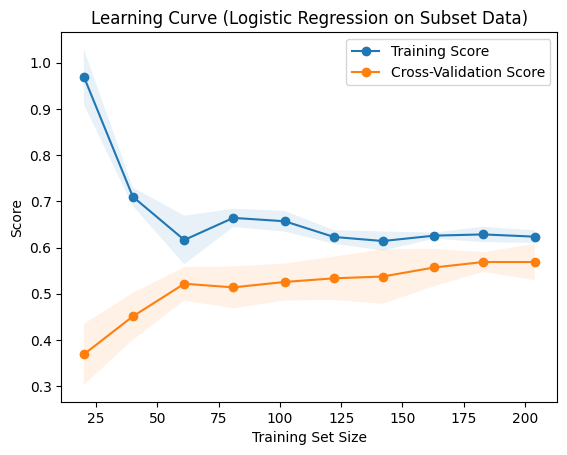

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan Logistic Regression dengan subset data
simple_model = LogisticRegression(max_iter=1000)
train_sizes, train_scores, test_scores = learning_curve(
    simple_model, X_small, y_small, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Visualisasi Learning Curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title("Learning Curve (Logistic Regression on Subset Data)")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

Output di atas menunjukkan Learning Curve dari model Logistic Regression pada subset data. Grafik ini menggambarkan performa model dalam hal training score dan cross-validation score seiring bertambahnya ukuran data pelatihan, yang dapat membantu kita dalam memahami apakah model mengalami overfitting atau underfitting.

Berikut adalah analisis dari grafik tersebut:

*   ITraining Score (garis biru): Pada awalnya, ketika ukuran data pelatihan sedikit, training score sangat tinggi (mendekati 1), yang berarti model sangat cocok dengan data pelatihan. Namun, seiring bertambahnya jumlah data pelatihan, nilai training score menurun dan akhirnya mendekati nilai stabil. Penurunan ini menunjukkan bahwa model kehilangan beberapa generalisasi sempurna pada data pelatihan ketika lebih banyak data ditambahkan, yang merupakan perilaku normal dalam pembelajaran mesin.

*   Cross-Validation Score (garis oranye): Nilai cross-validation score relatif rendah dibandingkan dengan training score, dan tetap stabil di level yang lebih rendah. Ini menunjukkan bahwa model mungkin tidak generalisasi dengan baik pada data yang belum pernah dilihat, indikasi kemungkinan overfitting pada data pelatihan. Meskipun data pelatihan bertambah, cross-validation score tidak meningkat secara signifikan, yang bisa berarti bahwa model memerlukan penyesuaian atau bahwa logistic regression kurang cocok untuk dataset ini.

*   Gap antara Training dan Cross-Validation Score: Kesenjangan yang besar antara training score dan cross-validation score menunjukkan bahwa model sangat cocok dengan data pelatihan tetapi kurang baik dalam memprediksi data validasi, yang merupakan tanda overfitting. Model berhasil mencapai akurasi tinggi pada data pelatihan tetapi tidak dapat mempertahankan akurasi yang sama pada data validasi.

*   User Warning: Terdapat peringatan yang mengatakan bahwa salah satu kelas dalam target (y) hanya memiliki 2 anggota, yang lebih kecil dari jumlah split yang dibutuhkan dalam cross-validation (n_splits=5). Hal ini mengindikasikan bahwa kelas target mungkin tidak seimbang atau jumlah data dalam kelas tersebut sangat sedikit, yang dapat memengaruhi hasil validasi dan kinerja model.


Secara keseluruhan, grafik learning curve ini menunjukkan bahwa model logistic regression mengalami overfitting pada subset data ini, yang tercermin dari perbedaan besar antara training score dan cross-validation score. Hal ini dapat disebabkan oleh ketidakseimbangan kelas atau ukuran dataset yang tidak mencukupi untuk generalisasi yang baik.








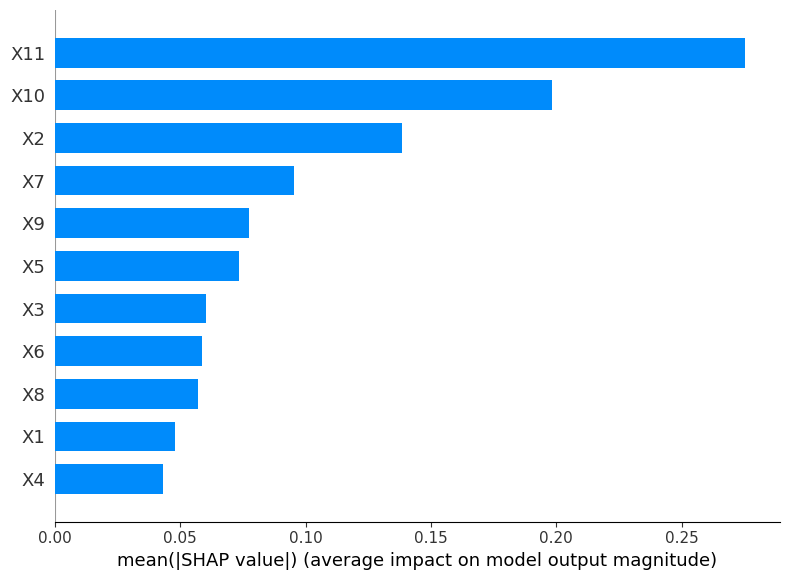

In [ ]:
import shap

# Membuat objek SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

Output di atas menunjukkan summary plot SHAP (SHapley Additive exPlanations) yang menggambarkan kontribusi rata-rata dari setiap fitur terhadap prediksi model. Dari visualisasi ini, terlihat bahwa fitur X11 dan X10 memiliki nilai rata-rata SHAP tertinggi, menunjukkan bahwa keduanya memiliki pengaruh paling besar terhadap hasil prediksi model. Fitur-fitur lain seperti X2, X7, dan X9 juga memiliki nilai SHAP yang cukup tinggi, meskipun tidak sebesar X11 dan X10, sementara fitur-fitur dengan nilai SHAP lebih rendah, seperti X1 dan X4, memiliki dampak yang minimal terhadap prediksi model. Sumbu X pada grafik ini menunjukkan nilai rata-rata absolut SHAP untuk setiap fitur, yang menunjukkan seberapa besar dampak rata-rata fitur tersebut terhadap output model. Visualisasi ini sangat membantu dalam memahami fitur mana yang paling signifikan dalam memengaruhi keputusan model, yang berguna untuk analisis lebih lanjut, penyederhanaan model, atau fokus pada fitur-fitur dengan dampak terbesar seperti X11 dan X10.

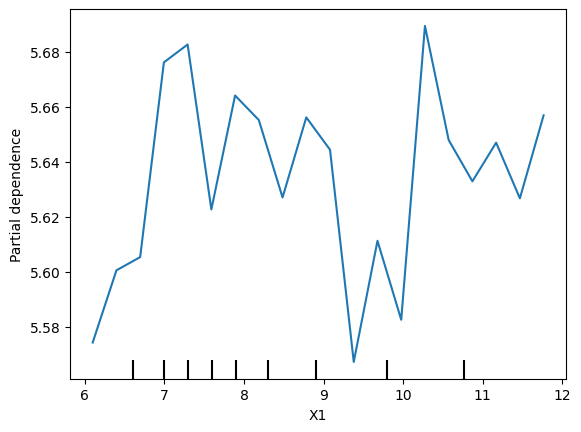

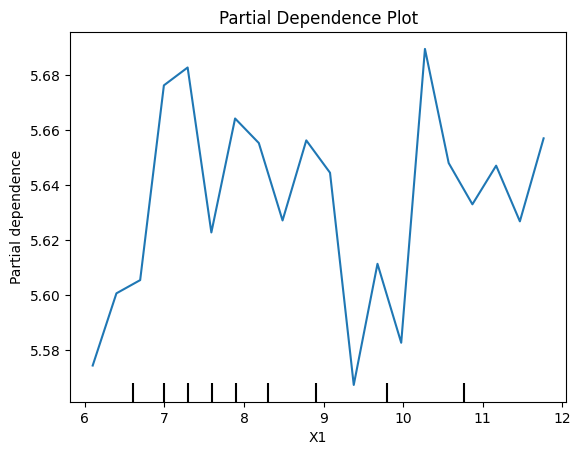

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pilih fitur yang ingin divisualisasikan (misalnya, fitur pertama)
features_to_plot = [0]  # Ganti dengan nama atau indeks fitur yang relevan

# Buat objek PartialDependenceDisplay
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features=features_to_plot, grid_resolution=20
)

# Tampilkan plot
display.plot()
plt.title("Partial Dependence Plot")
plt.show()

Output di atas adalah Partial Dependence Plot (PDP) untuk fitur X1, yang menunjukkan bagaimana variasi dalam nilai X1 memengaruhi prediksi model, dengan asumsi fitur lainnya tetap konstan. Grafik ini memvisualisasikan hubungan antara nilai X1 dan prediksi model, membantu kita memahami dampak langsung fitur X1 terhadap output.

Dalam grafik, sumbu horizontal mewakili rentang nilai X1, sementara sumbu vertikal menunjukkan nilai Partial Dependence, yaitu prediksi rata-rata model untuk setiap nilai X1. Fluktuasi pada garis menunjukkan bahwa prediksi model berubah-ubah seiring dengan perubahan nilai X1. Misalnya, ketika nilai X1 berada di sekitar 9 hingga 10, terdapat penurunan tajam pada nilai partial dependence, menunjukkan bahwa pada rentang nilai tersebut, prediksi model mengalami penurunan. Sebaliknya, di nilai X1 lainnya, model cenderung memberikan prediksi yang lebih tinggi.

Secara keseluruhan, grafik ini menunjukkan bahwa X1 memiliki pengaruh yang tidak linier terhadap prediksi model, dengan perubahan signifikan pada nilai tertentu. Visualisasi seperti ini berguna untuk memahami sensitivitas model terhadap fitur tertentu dan dapat membantu dalam interpretasi model, terutama dalam melihat bagaimana perubahan spesifik pada fitur memengaruhi hasil prediksi.